In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
dfx=pd.read_csv("Diabetes_Xtrain.csv")
dfy=pd.read_csv("Diabetes_Ytrain.csv")
dfxt=pd.read_csv("Diabetes_Xtest.csv")

In [34]:
dfx.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,7,168,88,42,321,38.2,0.787,40
1,8,110,76,0,0,27.8,0.237,58
2,7,147,76,0,0,39.4,0.257,43
3,2,100,66,20,90,32.9,0.867,28
4,4,129,86,20,270,35.1,0.231,23


In [7]:
dfy.head()

,Outcome
0,1
1,0
2,1
3,1
4,0


In [35]:
x=dfx.values
x.shape

(576, 8)

In [36]:
y=dfy.values.reshape((-1,))
y.shape

(576,)

In [37]:
xtest=dfxt.values

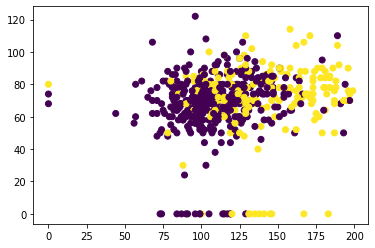

In [24]:
plt.scatter(x[:,1],x[:,2],c=y)

In [25]:
#knn

def dist(x1,x2):
    return np.sqrt(sum((x1-x2)**2))

def knn(x,y,query_pt,k=5):
    n=x.shape[0]
    vals=[]
    for i in range(0,n):
        d=dist(query_pt,x[i])
        vals.append((d,y[i]))
    vals=sorted(vals)
    vals=vals[:k]
    vals=np.array(vals)
    new_vals=np.unique(vals[:,1],return_counts=True)
    index=new_vals[1].argmax()
    
    pred=new_vals[0][index]
    
    return pred

In [46]:
pred=[]
for i in range(0,xtest.shape[0]):
    p=knn(x,y,xtest[i])
    pred.append(int(p))

In [47]:
print(pred)

[1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0]


In [55]:
no=np.unique(y,return_counts=True)
count=no[1]
print(count)

[375 201]


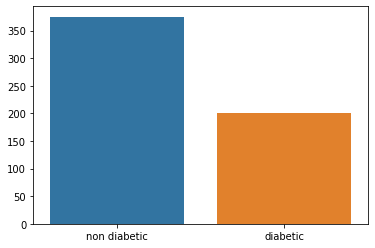

In [58]:
label=["non diabetic","diabetic"]
count=no[1]
sns.barplot(label,count)

In [64]:
no=np.unique(pred,return_counts=True)
no

(array([0, 1]), array([129,  63], dtype=int64))

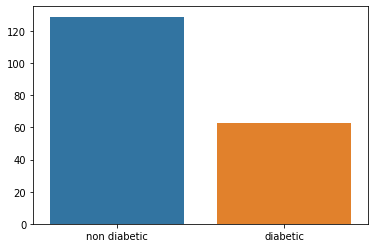

In [65]:
sns.barplot(label,no[1])